# Mycology

Thời lượng ước tính: **120** phút

## Giới thiệu lab
Nấm học (Mycology) là một nhánh của sinh học nói chung liên quan đến việc nghiên cứu nấm, đặc biệt là cấu tạo di truyền và sinh hóa của chúng cũng như việc sử dụng chúng đối với con người. Trong suốt lịch sử, nấm đã được sử dụng để xay xát, làm thuốc và thực phẩm. Hàng trăm năm qua, các loại nấm đã được sử dụng làm thuốc dân gian ở Nga, Trung Quốc và Nhật Bản. Các nhà khoa học ở những nơi khác cũng đã ghi nhận nhiều công dụng chữa bệnh của nấm, nhưng không phải tất cả các loại nấm đều có lợi - một số loại nấm khá nguy hiểm.

Trong lab này, bạn sẽ sử dụng cây quyết định để xem xét Tập dữ liệu về nấm, được trích từ Hướng dẫn thực địa của Hiệp hội Audobon về Nấm ở Bắc Mỹ (1981). Tập dữ liệu cung cấp chi tiết các loại nấm được mô tả về nhiều đặc điểm vật lý, chẳng hạn như kích thước nắp và chiều dài cuống, cùng với phân loại độc hoặc ăn được.

Như một tuyên bố từ chối trách nhiệm tiêu chuẩn, nếu bạn ăn một loại nấm ngẫu nhiên mà bạn tìm thấy là bạn đang dấn thân vào rủi ro. Mặc dù đã có nhiều nỗ lực để đảm bảo rằng thông tin chứa trong tập dữ liệu là chính xác, xin hãy hiểu rằng không một ai liên quan đến khóa học này chịu bất kỳ trách nhiệm hoặc nghĩa vụ nào đối với các lỗi, thiếu sót hoặc đại diện, được thể hiện hoặc ngụ ý có trong đó, hoặc có thể phát sinh từ việc bạn xác định nhầm một loại nấm. Hãy thận trọng và chỉ sử dụng lab này với mục đích cung cấp thông tin.

In [71]:
import pandas as pd

## 1. Chuẩn bị dữ liệu
Truy cập [trang của tập dữ liệu](https://archive.ics.uci.edu/ml/datasets/Mushroom), đọc kỹ và hiểu tập dữ liệu.

Load tập dữ liệu nấm vào khung dữ liệu `X` và xác minh rằng bạn đã làm đúng cách và chưa đưa vào bất kỳ thuộc tính mà không phải là một phần của tập dữ liệu.

Bạn không nên có bất kỳ chỉ số được nhân đôi nào. Bạn có thể kiểm tra thông tin về các tiêu đề có trong tập dữ liệu bằng cách sử dụng liên kết mà chúng tôi đã cung cấp ở trên. Đồng thời hãy đảm bảo rằng bạn đã nắm bắt đúng bất kỳ giá trị NA nào.

In [72]:
# Nhập code của bạn ở đây
X = pd.read_csv('agaricus-lepiota.data')
X.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [73]:
# Hiện những dòng dữ liệu có giá trị Nan
X[pd.isnull(X).any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


Với lab đơn giản này, chỉ cần thả bất kỳ hàng nào có nan trong đó, sau đó in ra shape của tập dữ liệu:

In [74]:
# Nhập code của bạn ở đây
X.dropna(axis=0,inplace=True)
print(X.shape)

(8124, 23)


Sao chép các nhãn ra khỏi khung dữ liệu vào biến `y`, sau đó xóa chúng khỏi` X`.

Mã hóa các nhãn, sử dụng thủ thuật `.map()` mà chúng tôi đã chỉ cho bạn trong Mô-đun 5, sử dụng cột class `e:0`, `p:1`.

In [75]:
# Nhập code của bạn ở đây
y = X[X.columns[0]].copy()
X.drop(X.columns[0],axis=1,inplace=True)

In [76]:
y = y.map({'e':0, 'p':1})
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

Mã hóa toàn bộ khung dữ liệu bằng cách sử dụng dummy:

In [77]:
X = pd.get_dummies(X)
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Chia dữ liệu của bạn thành các tập `test` và` train`. Kích thước `test` phải là 30% với `random_state` là 7.

Vui lòng sử dụng tên biến: `X_train`, `X_test`, `y_train`, và `y_test`:

In [78]:
# Nhập code của bạn ở đây
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

## 2. Huấn luyện và Đánh giá Mô hình

Tạo bộ phân loại DT. Không cần đặt bất kỳ tham số nào:

In [79]:
# Nhập code của bạn ở đây
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

Huấn luyện bộ phân loại trên dữ liệu và nhãn `training`; sau đó, chấm điểm bộ phân loại theo độ chính xác và F1 score trên dữ liệu và nhãn `testing`:

In [80]:
# Nhập code của bạn ở đây
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
score = model.score(X_test,y_test)

In [82]:
print("High-Dimensionality Score: ", round((score*100), 3))

High-Dimensionality Score:  100.0


Sử dụng code trên trang SciKit-Learn của khóa học để xuất tệp .DOT, sau đó hiển thị .DOT thành .PNG.

Bạn sẽ cần cài đặt graphviz để thực hiện việc này. Trên macOS, bạn có thể `brew install graphviz`. Trên Windows 10, graphviz cài đặt thông qua trình cài đặt .msi mà bạn có thể download từ trang web graphviz. Ngoài ra, có thể sử dụng trình chỉnh sửa đồ thị gvedit.exe để xem cây trực tiếp từ tệp tree.dot đã xuất mà không cần phải gọi. Trên các hệ thống khác, sử dụng các lệnh tương tự.

Nếu bạn gặp sự cố khi cài đặt graphviz hoặc không có quyền, bạn luôn có thể trực quan hóa tệp .dot của mình trên trang web: http://webgraphviz.com/.

In [83]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

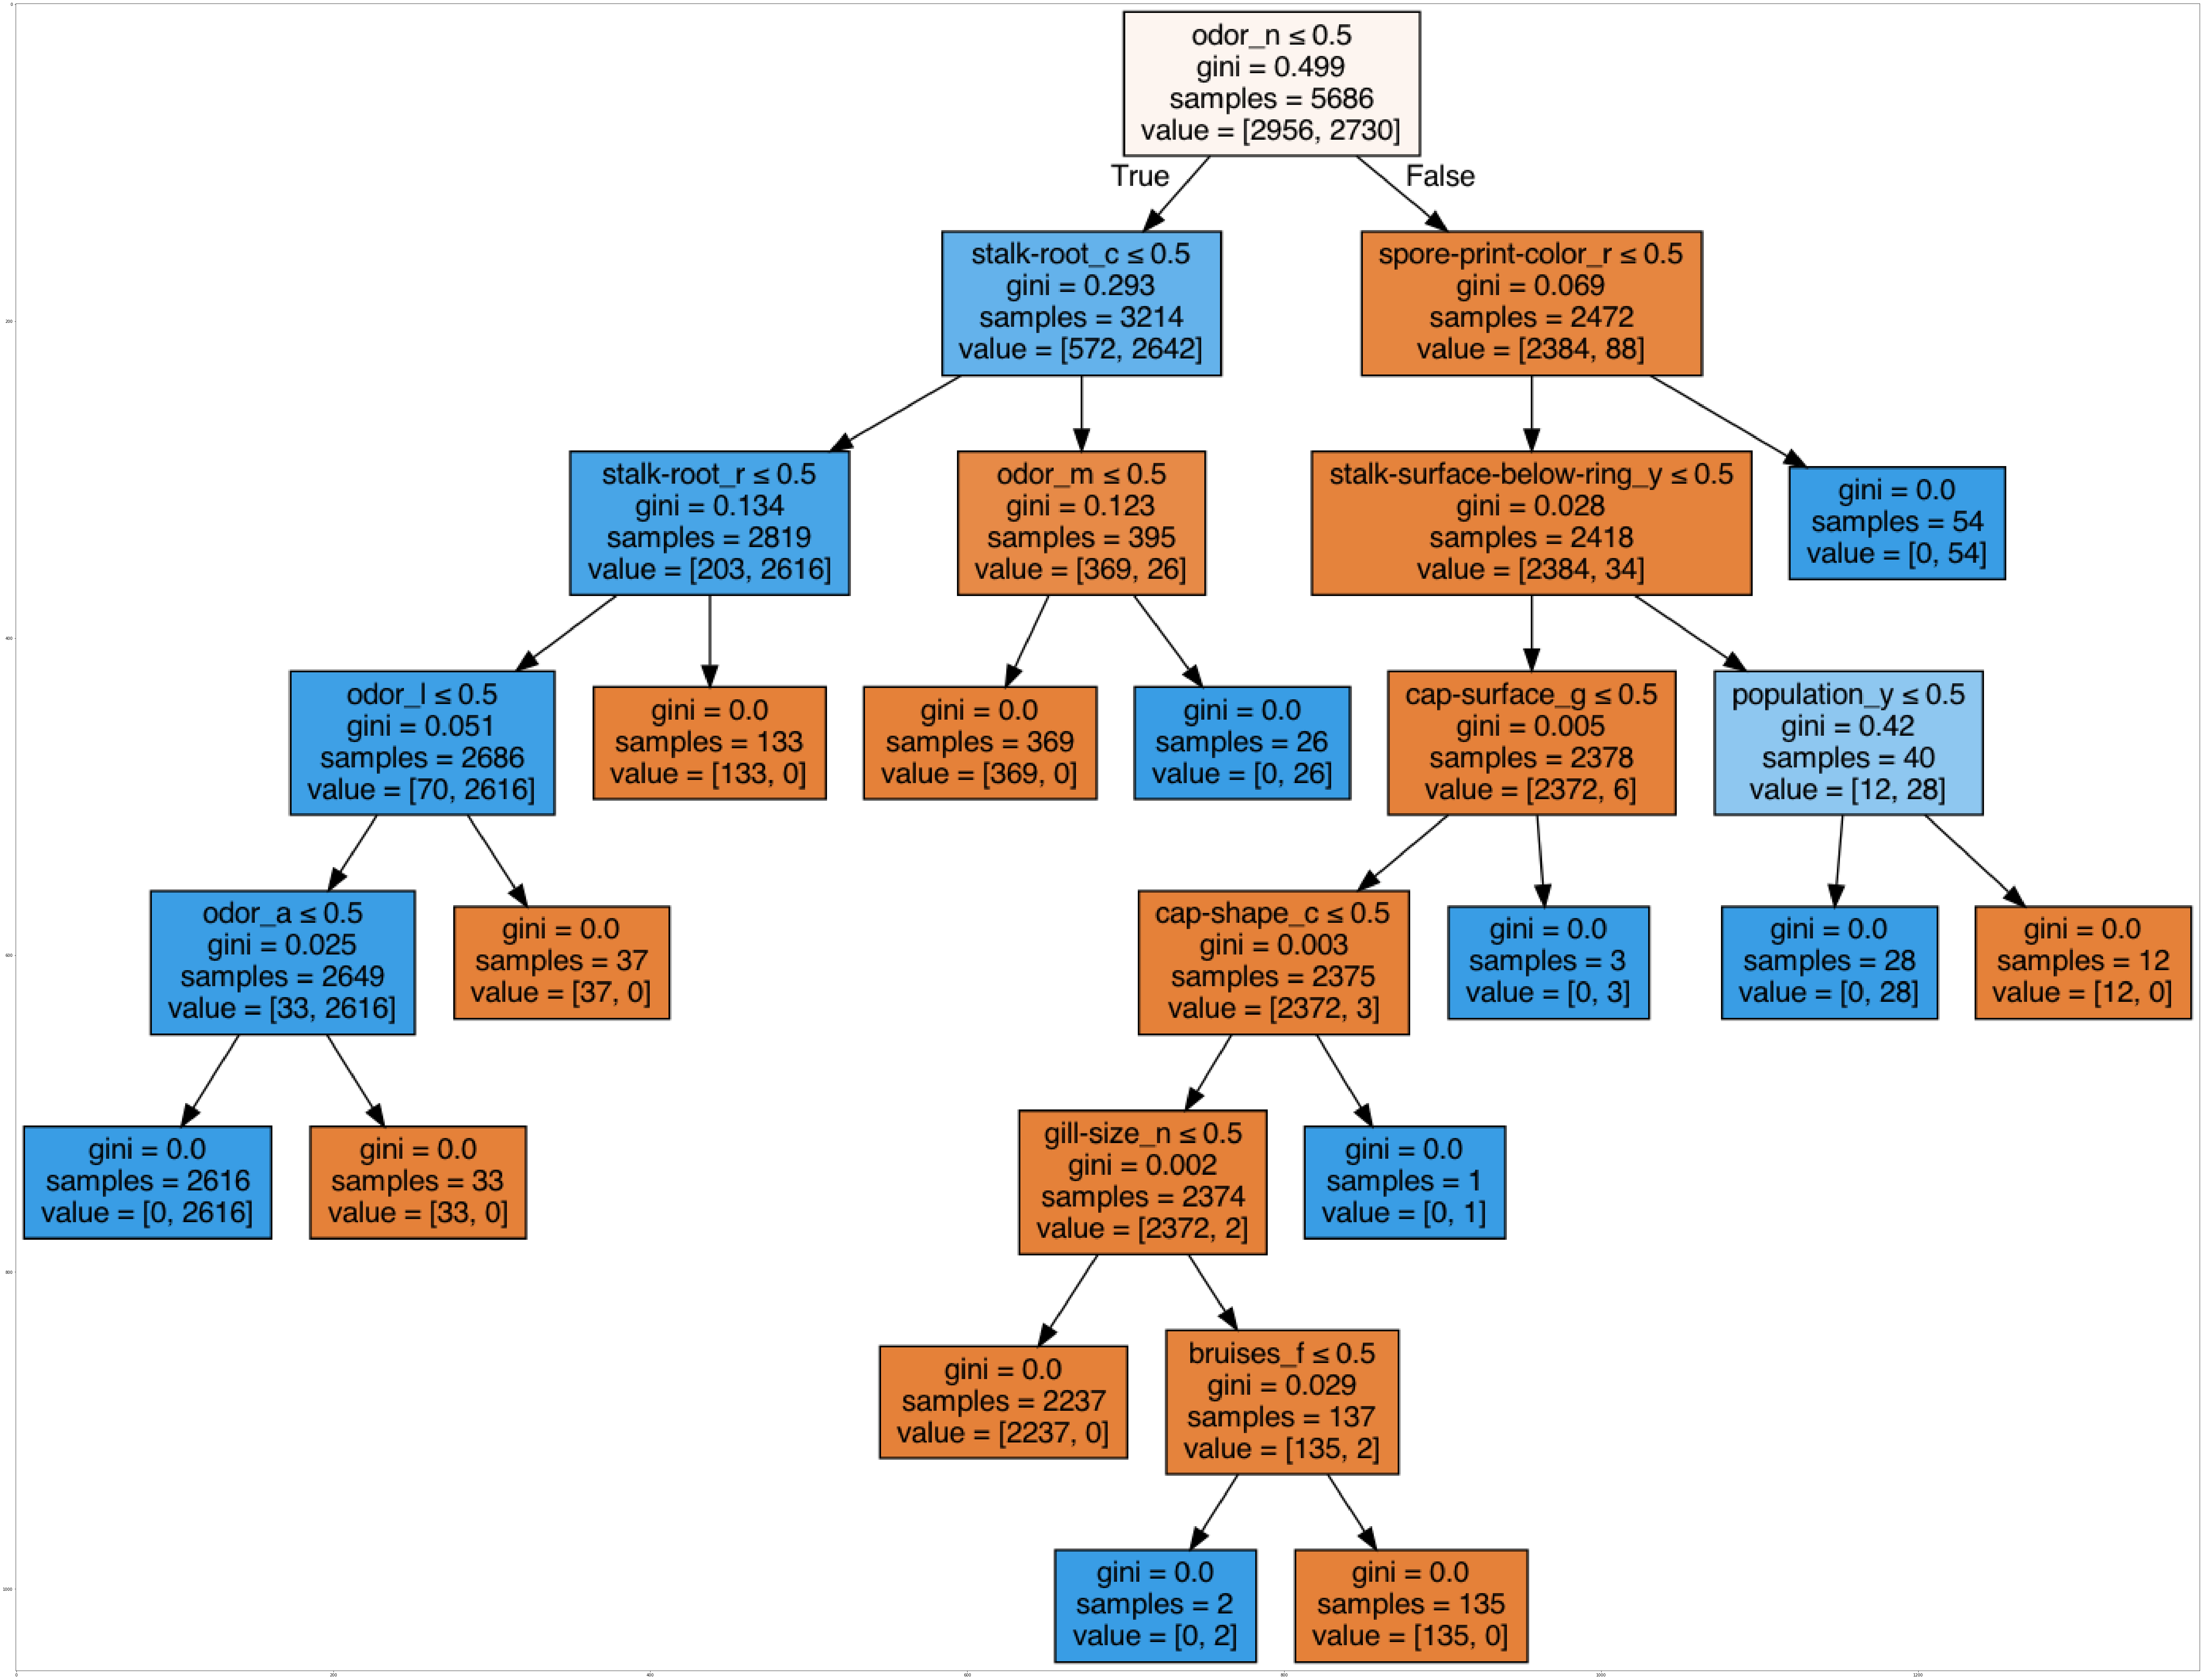

In [84]:
dot_data = StringIO()
filename = "tree.png"
featureNames = X.columns
out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data,filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')